In [1]:
# package installation

!pip install numpy
!pip install matplotlib

In [16]:
# required imports

import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
import cv2

In [3]:
# input training 
# all the preprocessing has been done using MATLAB and C++

# take random 50 samples from the pixels with river
river_training_samples = [
    [7, 8, 9, 24],
    [7, 9, 11, 15],
    [8, 8, 11, 21],
    [9, 11, 13, 22],
    [7, 9, 11, 25],
    [9, 10, 16, 30],
    [7, 8, 15, 17],
    [7, 8, 11, 23],
    [8, 8, 12, 15],
    [4, 6, 5, 7],
    [7, 8, 10, 29],
    [8, 9, 13, 19],
    [8, 9, 11, 26],
    [9, 9, 12, 25],
    [8, 8, 11, 23],
    [7, 9, 12, 24],
    [8, 9, 11, 19],
    [8, 11, 16, 28],
    [6, 8, 8, 21],
    [8, 10, 14, 25],
    [5, 6, 7, 24],
    [9, 12, 18, 26],
    [8, 9, 11, 24],
    [6, 8, 13, 20],
    [7, 8, 14, 19],
    [6, 9, 12, 32],
    [8, 9, 11, 24],
    [9, 11, 11, 24],
    [9, 9, 10, 18],
    [8, 8, 11, 24],
    [6, 6, 7, 10],
    [7, 8, 11, 17],
    [7, 8, 12, 20],
    [7, 8, 12, 19],
    [7, 8, 8, 21],
    [9, 10, 12, 22],
    [9, 11, 12, 21],
    [9, 10, 12, 23],
    [9, 10, 11, 19],
    [7, 9, 13, 25],
    [5, 7, 9, 22],
    [9, 11, 10, 27],
    [6, 7, 7, 17],
    [7, 10, 12, 27],
    [10, 11, 16, 17],
    [4, 6, 8, 22],
    [10, 10, 16, 21],
    [6, 7, 9, 23],
    [10, 11, 19, 26],
    [6, 8, 7, 16],
    [7, 8, 12, 19],
    [8, 10, 13, 27],
    [10, 11, 11, 20],
    [7, 9, 11, 24],
    [7, 8, 11, 24],
    [9, 10, 13, 21],
    [6, 8, 11, 17],
    [8, 9, 8, 23],
    [9, 10, 9, 17],
    [8, 9, 10, 22],
    [6, 6, 9, 17],
    [8, 9, 8, 23],
    [11, 12, 15, 17],
    [11, 12, 17, 17],
    [8, 9, 12, 14],
    [6, 10, 14, 24],
    [10, 13, 14, 30],
    [9, 10, 14, 23],
    [6, 8, 11, 20],
    [12, 14, 18, 9],
    [11, 14, 17, 7]
]

river_training_samples = np.array(river_training_samples)

In [4]:
# # non-river training samples

# non_river_training_samples = [
#     [7, 9, 11, 17],
#     [9, 8, 8, 13],
#     [4, 5, 6, 20],
#     [6, 7, 9, 16],
#     [12, 14, 18, 12],
#     [10, 13, 14, 27],
#     [6, 8, 11, 19],
#     [7, 10, 13, 19],
#     [12, 12, 14, 29],
#     [8, 9, 12, 21],
#     [7, 8, 10, 18],
#     [7, 9, 15, 18],
#     [6, 7, 10, 21],
#     [5, 6, 6, 14],
#     [10, 10, 14, 28],
#     [6, 7, 10, 19],
#     [11, 13, 16, 24],
#     [5, 7, 7, 21],
#     [6, 7, 9, 18],
#     [3, 4, 6, 16],
#     [5, 6, 7, 18],
#     [10, 10, 11, 16],
#     [7, 9, 12, 25],
#     [10, 9, 14, 17],
#     [7, 8, 11, 20],
#     [12, 15, 17, 7],
#     [7, 9, 11, 28],
#     [14, 15, 15, 30],
#     [7, 8, 12, 25],
#     [7, 10, 12, 27],
#     [10, 10, 13, 22],
#     [7, 9, 11, 22],
#     [6, 8, 12, 14],
#     [9, 11, 15, 23],
#     [13, 15, 20, 29],
#     [8, 9, 8, 20],
#     [8, 9, 13, 15],
#     [11, 13, 18, 25],
#     [9, 10, 14, 16],
#     [7, 9, 14, 18],
#     [11, 12, 16, 25],
#     [5, 8, 8, 23],
#     [9, 8, 10, 23],
#     [7, 8, 13, 25],
#     [8, 8, 9, 23],
#     [6, 9, 11, 17],
#     [11, 11, 15, 22],
#     [9, 10, 12, 26],
#     [10, 11, 11, 24],
#     [12, 13, 20, 30],
#     [10, 10, 12, 20],
#     [9, 10, 13, 26],
#     [13, 15, 18, 7],
#     [10, 11, 15, 29],
#     [9, 8, 7, 21],
#     [9, 8, 10, 21],
#     [11, 14, 18, 30],
#     [7, 8, 9, 19],
#     [7, 7, 8, 26],
#     [11, 10, 14, 17],
#     [10, 10, 13, 13],
#     [12, 14, 17, 7],
#     [7, 10, 8, 22],
#     [9, 9, 13, 17],
#     [9, 9, 11, 20],
#     [8, 8, 12, 12],
#     [12, 13, 18, 22],
#     [6, 6, 13, 10],
#     [8, 8, 13, 13],
#     [8, 8, 13, 13],
#     [9, 10, 14, 21],
#     [10, 11, 17, 21],
#     [5, 7, 11, 18],
#     [16, 16, 22, 26],
#     [8, 10, 16, 27],
#     [10, 12, 13, 20],
#     [6, 9, 15, 18],
#     [10, 11, 13, 14],
#     [5, 7, 7, 9],
#     [6, 9, 9, 25],
#     [14, 16, 19, 30],
#     [12, 13, 16, 28],
#     [10, 10, 16, 23],
#     [10, 10, 13, 14],
#     [17, 16, 19, 25],
#     [10, 9, 10, 19],
#     [8, 8, 13, 19],
#     [7, 10, 13, 19],
#     [5, 6, 6, 14],
#     [7, 8, 7, 26],
#     [5, 5, 5, 4],
#     [10, 10, 13, 21],
#     [9, 10, 13, 15],
#     [9, 10, 13, 20],
#     [13, 15, 19, 19],
#     [3, 5, 3, 6],
#     [9, 9, 12, 14],
#     [6, 9, 16, 25],
#     [7, 7, 9, 15],
#     [6, 7, 7, 18]
# ]

# non_river_training_samples = np.array(non_river_training_samples)

In [5]:
# # non-river training samples

# non_river_training_samples = [
#     [7, 9, 11, 17],
#     [9, 8, 8, 13],
#     [4, 5, 6, 20],
#     [6, 7, 9, 16],
#     [12, 14, 18, 12],
#     [10, 13, 14, 27],
#     [6, 8, 11, 19],
#     [7, 10, 13, 19],
#     [12, 12, 14, 29],
#     [8, 9, 12, 21],
#     [7, 8, 10, 18],
#     [7, 9, 15, 18],
#     [6, 7, 10, 21],
#     [5, 6, 6, 14],
#     [10, 10, 14, 28],
#     [6, 7, 10, 19],
#     [11, 13, 16, 24],
#     [5, 7, 7, 21],
#     [6, 7, 9, 18],
#     [3, 4, 6, 16],
#     [5, 6, 7, 18],
#     [10, 10, 11, 16],
#     [7, 9, 12, 25],
#     [10, 9, 14, 17],
#     [7, 8, 11, 20],
#     [12, 15, 17, 7],
#     [7, 9, 11, 28],
#     [14, 15, 15, 30],
#     [7, 8, 12, 25],
#     [7, 10, 12, 27],
#     [10, 10, 13, 22],
#     [7, 9, 11, 22],
#     [6, 8, 12, 14],
#     [9, 11, 15, 23],
#     [13, 15, 20, 29],
#     [8, 9, 8, 20],
#     [8, 9, 13, 15],
#     [11, 13, 18, 25],
#     [9, 10, 14, 16],
#     [7, 9, 14, 18],
#     [11, 12, 16, 25],
#     [5, 8, 8, 23],
#     [9, 8, 10, 23],
#     [7, 8, 13, 25],
#     [8, 8, 9, 23],
#     [6, 9, 11, 17],
#     [11, 11, 15, 22],
#     [9, 10, 12, 26],
#     [10, 11, 11, 24],
#     [12, 13, 20, 30],
#     [10, 10, 12, 20],
#     [9, 10, 13, 26],
#     [13, 15, 18, 7],
#     [10, 11, 15, 29],
#     [9, 8, 7, 21],
#     [9, 8, 10, 21],
#     [11, 14, 18, 30],
#     [11, 10, 14, 17],
#     [10, 10, 13, 13],
#     [12, 14, 17, 7],
#     [7, 10, 8, 22],
#     [9, 9, 13, 17],
#     [9, 9, 11, 20],
#     [8, 8, 12, 12],
#     [12, 13, 18, 22],
#     [8, 8, 13, 13],
#     [8, 8, 13, 13],
#     [9, 10, 14, 21],
#     [10, 11, 17, 21],
#     [16, 16, 22, 26],
#     [8, 10, 16, 27],
#     [10, 12, 13, 20],
#     [10, 11, 13, 14],
#     [14, 16, 19, 30],
#     [12, 13, 16, 28],
#     [10, 10, 16, 23],
#     [10, 10, 13, 14],
#     [17, 16, 19, 25],
#     [10, 9, 10, 19],
#     [8, 8, 13, 19],
#     [10, 10, 13, 21],
#     [9, 10, 13, 15],
#     [9, 10, 13, 20],
#     [13, 15, 19, 19],
#     [9, 9, 12, 14],
#     [5, 7, 10, 22],
# [5, 7, 8, 19],
# [7, 8, 14, 18],
# [6, 8, 10, 23],
# [5, 8, 10, 19],
# [9, 12, 15, 23],
# [9, 10, 13, 22],
# [9, 9, 12, 16],
# [6, 9, 11, 17],
# [10, 8, 12, 16],
# [8, 10, 9, 27],
# [7, 8, 11, 17],
# [9, 10, 13, 24],
# [11, 11, 14, 28],
# [8, 7, 10, 10],
# [6, 7, 10, 20],
# [8, 10, 15, 22],
# [7, 11, 13, 29],
# [5, 7, 8, 17],
# [6, 7, 11, 18],
# [9, 12, 17, 32],
# [8, 10, 14, 24],
# [6, 8, 11, 13],
# [6, 8, 11, 22],
# [8, 10, 11, 26],
# [16, 16, 16, 19],
# [9, 8, 9, 15],
# [7, 8, 7, 24],
# [7, 11, 11, 21],
# [6, 8, 10, 20],
# [6, 8, 7, 20],
# [8, 10, 10, 24],
# [7, 8, 10, 21],
# [8, 9, 18, 25],
# [5, 6, 8, 19],
# [10, 13, 15, 34],
# [2, 4, 6, 13],
# [6, 8, 10, 25],
# [7, 9, 11, 23],
# [7, 9, 12, 20],
# [7, 9, 8, 17],
# [6, 7, 7, 18],
# [13, 15, 18, 7],
# [7, 8, 10, 20],
# [12, 15, 23, 23],
# [6, 8, 11, 19],
# [8, 9, 13, 21],
# [7, 9, 12, 24],
# [9, 10, 13, 19],
# [8, 8, 9, 20],
# [9, 11, 13, 28],
# [7, 8, 13, 18],
# [4, 7, 10, 17],
# [7, 8, 10, 19],
# [12, 14, 17, 7],
# [6, 9, 12, 19],
# [6, 8, 11, 19],
# [9, 10, 11, 19],
# [11, 12, 18, 29],
# [8, 9, 13, 16],
# [9, 10, 11, 21],
# [7, 8, 10, 21],
# [5, 6, 7, 19],
# [8, 8, 12, 17],
# [5, 7, 9, 20],
# [6, 10, 11, 23],
# [8, 10, 11, 19],
# [5, 7, 8, 19],
# [11, 12, 19, 28],
# [6, 7, 8, 25],
# [13, 13, 18, 26],
# [5, 7, 11, 18],
# [12, 14, 18, 7],
# [11, 13, 20, 22],
# [7, 8, 9, 23],
# [17, 20, 26, 33],
# [7, 9, 16, 14],
# [9, 13, 14, 24],
# [11, 11, 13, 24],
# [5, 8, 10, 26],
# [8, 9, 11, 21],
# [7, 9, 14, 26],
# [6, 8, 12, 21],
# [13, 14, 19, 27],
# [7, 7, 11, 19],
# [11, 11, 12, 25],
# [6, 8, 11, 21],
# [7, 8, 10, 18],
# [9, 10, 15, 19],
# [13, 13, 16, 24],
# [6, 6, 9, 19],
# [10, 11, 11, 26],
# [6, 7, 9, 18],
# [5, 6, 6, 11],
# [7, 8, 9, 21],
# [10, 11, 16, 28],
# [6, 9, 11, 22],
# [7, 9, 14, 22],
# [4, 8, 10, 29],
# [6, 8, 13, 16],
# [6, 8, 9, 18],
# [4, 6, 11, 14],
# [7, 10, 12, 26],
# [12, 11, 11, 20],
# [9, 9, 14, 23],
# [13, 15, 17, 7],
# [17, 20, 23, 26],
# [11, 12, 17, 23],
# [8, 10, 12, 21],
# [9, 11, 16, 25],
# [6, 8, 8, 25],
# [12, 14, 17, 7],
# [9, 10, 13, 21],
# [9, 10, 10, 17],
# [8, 10, 16, 26],
# [8, 9, 10, 20],
# [8, 8, 7, 29],
# [12, 14, 15, 26],
# [10, 12, 20, 24],
# [13, 14, 18, 28],
# [11, 13, 11, 26],
# [7, 10, 10, 38],
# [6, 9, 11, 18],
# [7, 8, 8, 13],
# [11, 13, 15, 19],
# [7, 7, 11, 12],
# [8, 9, 10, 18],
# [7, 8, 10, 18],
# [10, 10, 13, 16],
# [13, 15, 18, 6],
# [10, 10, 12, 23],
# [12, 15, 12, 31],
# [7, 7, 9, 17],
# [9, 8, 14, 15],
# [7, 7, 7, 17],
# [12, 15, 18, 10],
# [10, 10, 14, 19],
# [13, 13, 17, 29],
# [9, 10, 13, 19],
# [9, 10, 12, 28],
# [11, 12, 16, 28],
# [9, 9, 10, 24],
# [8, 10, 15, 27],
# [11, 11, 13, 17],
# [13, 16, 17, 6],
# [7, 8, 11, 19],
# [11, 10, 14, 15],
# [11, 11, 17, 15],
# [12, 15, 18, 7],
# [9, 10, 11, 28],
# [7, 9, 9, 19],
# [11, 12, 17, 22],
# [12, 11, 13, 28],
# [7, 8, 11, 20],
# [9, 10, 14, 21],
# [7, 7, 13, 13],
# [5, 6, 8, 17],
# [4, 7, 8, 17],
# [10, 10, 15, 17],
# [11, 12, 15, 22],
# [7, 9, 9, 21],
# [6, 8, 12, 17],
# [10, 12, 13, 26],
# [10, 12, 16, 21],
# [3, 5, 6, 18],
# [12, 12, 13, 18],
# [12, 13, 17, 20],
# [6, 7, 10, 16],
# [9, 9, 12, 14],
# [4, 6, 6, 20],
# [10, 11, 16, 17],
# [11, 13, 17, 21],
# [2, 6, 7, 18],
# [4, 7, 8, 19],
# [5, 7, 8, 21],
# [11, 11, 13, 20],
# [12, 15, 18, 7],
# [12, 14, 20, 30],
# [7, 8, 9, 15],
# [14, 16, 21, 25],
# [11, 12, 15, 26],
# [7, 9, 9, 15],
# [9, 8, 12, 14],
# [10, 10, 15, 15],
# [6, 8, 10, 14],
# [14, 12, 14, 20],
# [9, 9, 13, 20],
# [16, 16, 22, 25],
# [8, 9, 16, 14],
# [7, 7, 9, 12],
# [8, 9, 13, 14],
# [12, 11, 15, 17],
# [12, 12, 16, 21],
# [9, 10, 14, 13],
# [9, 9, 15, 13],
# [7, 8, 9, 21],
# [11, 11, 16, 14],
# [10, 11, 10, 23],
# [11, 10, 17, 13],
# [10, 10, 11, 14],
# [9, 9, 11, 16],
# [9, 10, 14, 16],
# [8, 9, 9, 14],
# [7, 7, 7, 13],
# [9, 10, 11, 20],
# [10, 9, 14, 15],
# [9, 10, 13, 20],
# [12, 12, 15, 28],
# [5, 6, 6, 4],
# [9, 9, 12, 22],
# [6, 7, 7, 28],
# [14, 14, 17, 19],
# [7, 9, 12, 17],
# [7, 8, 13, 14],
# [9, 8, 12, 17],
# [8, 12, 14, 19],
# [9, 9, 14, 11],
# [7, 8, 9, 16],
# [9, 9, 14, 15],
# [9, 9, 12, 21],
# [7, 7, 11, 20],
# [9, 9, 12, 13],
# [9, 9, 9, 26],
# [12, 11, 12, 27],
# [11, 11, 14, 15],
# [9, 9, 10, 27],
# [5, 7, 10, 19],
# [9, 10, 13, 12],
# [5, 6, 5, 2],
# [10, 10, 15, 17],
# [6, 6, 5, 5],
# [13, 16, 25, 28],
# [9, 8, 10, 13],
# [10, 11, 13, 14],
# [7, 9, 9, 20],
# [5, 8, 8, 16],
# [10, 11, 15, 13],
# [9, 10, 14, 18],
# [11, 11, 15, 18],
# [4, 5, 4, 1],
# [10, 9, 12, 16],
# [7, 9, 13, 16],
# [8, 8, 11, 15],
# [7, 7, 6, 9],
# [6, 8, 6, 8],
# [7, 9, 9, 42],
# [7, 7, 6, 13],
# [5, 7, 9, 22],
# [14, 12, 19, 19],
# [7, 7, 6, 9]
# ]

# non_river_training_samples = np.array(non_river_training_samples)

In [6]:
# non-river training samples

non_river_training_samples = [
    [7, 9, 11, 17],
    [9, 8, 8, 13],
    [4, 5, 6, 20],
    [6, 7, 9, 16],
    [12, 14, 18, 12],
    [10, 13, 14, 27],
    [6, 8, 11, 19],
    [7, 10, 13, 19],
    [12, 12, 14, 29],
    [8, 9, 12, 21],
    [7, 8, 10, 18],
    [7, 9, 15, 18],
    [6, 7, 10, 21],
    [5, 6, 6, 14],
    [10, 10, 14, 28],
    [6, 7, 10, 19],
    [11, 13, 16, 24],
    [5, 7, 7, 21],
    [6, 7, 9, 18],
    [3, 4, 6, 16],
    [5, 6, 7, 18],
    [10, 10, 11, 16],
    [7, 9, 12, 25],
    [10, 9, 14, 17],
    [7, 8, 11, 20],
    [12, 15, 17, 7],
    [7, 9, 11, 28],
    [14, 15, 15, 30],
    [7, 8, 12, 25],
    [7, 10, 12, 27],
    [10, 10, 13, 22],
    [7, 9, 11, 22],
    [6, 8, 12, 14],
    [9, 11, 15, 23],
    [13, 15, 20, 29],
    [8, 9, 8, 20],
    [8, 9, 13, 15],
    [11, 13, 18, 25],
    [9, 10, 14, 16],
    [7, 9, 14, 18],
    [11, 12, 16, 25],
    [5, 8, 8, 23],
    [9, 8, 10, 23],
    [7, 8, 13, 25],
    [8, 8, 9, 23],
    [6, 9, 11, 17],
    [11, 11, 15, 22],
    [9, 10, 12, 26],
    [10, 11, 11, 24],
    [12, 13, 20, 30],
    [10, 10, 12, 20],
    [9, 10, 13, 26],
    [13, 15, 18, 7],
    [10, 11, 15, 29],
    [9, 8, 7, 21],
    [9, 8, 10, 21],
    [11, 14, 18, 30],
    [11, 10, 14, 17],
    [10, 10, 13, 13],
    [12, 14, 17, 7],
    [7, 10, 8, 22],
    [9, 9, 13, 17],
    [9, 9, 11, 20],
    [8, 8, 12, 12],
    [12, 13, 18, 22],
    [8, 8, 13, 13],
    [8, 8, 13, 13],
    [9, 10, 14, 21],
    [10, 11, 17, 21],
    [16, 16, 22, 26],
    [8, 10, 16, 27],
    [10, 12, 13, 20],
    [10, 11, 13, 14],
    [14, 16, 19, 30],
    [12, 13, 16, 28],
    [10, 10, 16, 23],
    [10, 10, 13, 14],
    [17, 16, 19, 25],
    [10, 9, 10, 19],
    [8, 8, 13, 19],
    [10, 10, 13, 21],
    [9, 10, 13, 15],
    [9, 10, 13, 20],
    [13, 15, 19, 19],
    [9, 9, 12, 14],
    [5, 7, 10, 22],
[5, 7, 8, 19],
[7, 8, 14, 18],
[6, 8, 10, 23],
[5, 8, 10, 19],
[9, 12, 15, 23],
[9, 10, 13, 22],
[9, 9, 12, 16],
[6, 9, 11, 17],
[10, 8, 12, 16],
[8, 10, 9, 27],
[7, 8, 11, 17],
[9, 10, 13, 24],
[11, 11, 14, 28],
[8, 7, 10, 10],
[6, 7, 10, 20],
[8, 10, 15, 22],
[7, 11, 13, 29],
[5, 7, 8, 17],
[6, 7, 11, 18],
[9, 12, 17, 32],
[8, 10, 14, 24],
[6, 8, 11, 13],
[6, 8, 11, 22],
[8, 10, 11, 26],
[16, 16, 16, 19],
[9, 8, 9, 15],
[7, 8, 7, 24],
[7, 11, 11, 21],
[6, 8, 10, 20],
[6, 8, 7, 20],
[8, 10, 10, 24],
[7, 8, 10, 21],
[8, 9, 18, 25],
[5, 6, 8, 19],
[10, 13, 15, 34],
[2, 4, 6, 13],
[6, 8, 10, 25],
[7, 9, 11, 23],
[7, 9, 12, 20],
[7, 9, 8, 17],
[6, 7, 7, 18],
[13, 15, 18, 7],
[7, 8, 10, 20],
[12, 15, 23, 23],
[6, 8, 11, 19],
[8, 9, 13, 21],
[7, 9, 12, 24],
[9, 10, 13, 19],
[8, 8, 9, 20],
[9, 11, 13, 28],
[7, 8, 13, 18],
[4, 7, 10, 17],
[7, 8, 10, 19],
[12, 14, 17, 7],
[6, 9, 12, 19],
[6, 8, 11, 19],
[9, 10, 11, 19],
[11, 12, 18, 29],
[8, 9, 13, 16],
[9, 10, 11, 21],
[7, 8, 10, 21],
[5, 6, 7, 19],
[8, 8, 12, 17],
[5, 7, 9, 20],
[6, 10, 11, 23],
[8, 10, 11, 19],
[5, 7, 8, 19],
[11, 12, 19, 28],
[6, 7, 8, 25],
[13, 13, 18, 26],
[5, 7, 11, 18],
[12, 14, 18, 7],
[11, 13, 20, 22],
[7, 8, 9, 23],
[17, 20, 26, 33],
[7, 9, 16, 14],
[9, 13, 14, 24],
[11, 11, 13, 24],
[5, 8, 10, 26],
[8, 9, 11, 21],
[7, 9, 14, 26],
[6, 8, 12, 21],
[13, 14, 19, 27],
[7, 7, 11, 19],
[11, 11, 12, 25],
[6, 8, 11, 21],
[7, 8, 10, 18],
[9, 10, 15, 19],
[13, 13, 16, 24],
[6, 6, 9, 19],
[10, 11, 11, 26],
[6, 7, 9, 18],
[5, 6, 6, 11],
[7, 8, 9, 21],
[10, 11, 16, 28],
[6, 9, 11, 22],
[7, 9, 14, 22],
[4, 8, 10, 29],
[6, 8, 13, 16],
[6, 8, 9, 18],
[4, 6, 11, 14],
[7, 10, 12, 26],
[12, 11, 11, 20],
[9, 9, 14, 23],
[13, 15, 17, 7],
[17, 20, 23, 26],
[11, 12, 17, 23],
[8, 10, 12, 21],
[9, 11, 16, 25],
[6, 8, 8, 25],
[12, 14, 17, 7],
[9, 10, 13, 21],
[9, 10, 10, 17],
[8, 10, 16, 26],
[8, 9, 10, 20],
[8, 8, 7, 29],
[12, 14, 15, 26],
[10, 12, 20, 24],
[13, 14, 18, 28],
[11, 13, 11, 26],
[7, 10, 10, 38],
[6, 9, 11, 18],
[7, 8, 8, 13],
[11, 13, 15, 19],
[7, 7, 11, 12],
[8, 9, 10, 18],
[7, 8, 10, 18],
[10, 10, 13, 16],
[13, 15, 18, 6],
[10, 10, 12, 23],
[12, 15, 12, 31],
[7, 7, 9, 17],
[9, 8, 14, 15],
[7, 7, 7, 17],
[12, 15, 18, 10],
[10, 10, 14, 19],
[13, 13, 17, 29],
[9, 10, 13, 19],
[9, 10, 12, 28],
[11, 12, 16, 28],
[9, 9, 10, 24],
[8, 10, 15, 27],
[11, 11, 13, 17],
[13, 16, 17, 6],
[7, 8, 11, 19],
[11, 10, 14, 15],
[11, 11, 17, 15],
[12, 15, 18, 7],
[9, 10, 11, 28],
[7, 9, 9, 19],
[11, 12, 17, 22],
[12, 11, 13, 28],
[7, 8, 11, 20],
[9, 10, 14, 21],
[7, 7, 13, 13],
[5, 6, 8, 17],
[4, 7, 8, 17],
[10, 10, 15, 17],
[11, 12, 15, 22],
[7, 9, 9, 21],
[6, 8, 12, 17],
[10, 12, 13, 26],
[10, 12, 16, 21],
[3, 5, 6, 18],
[12, 12, 13, 18],
[12, 13, 17, 20],
[6, 7, 10, 16],
[9, 9, 12, 14],
[4, 6, 6, 20],
[10, 11, 16, 17],
[11, 13, 17, 21],
[2, 6, 7, 18],
[4, 7, 8, 19],
[5, 7, 8, 21],
[11, 11, 13, 20],
[12, 15, 18, 7],
[12, 14, 20, 30],
[7, 8, 9, 15],
[14, 16, 21, 25],
[11, 12, 15, 26],
[7, 9, 9, 15],
[9, 8, 12, 14],
[10, 10, 15, 15],
[6, 8, 10, 14],
[14, 12, 14, 20],
[9, 9, 13, 20],
[16, 16, 22, 25],
[8, 9, 16, 14],
[7, 7, 9, 12],
[8, 9, 13, 14],
[12, 11, 15, 17],
[12, 12, 16, 21],
[9, 10, 14, 13],
[9, 9, 15, 13],
[7, 8, 9, 21],
[11, 11, 16, 14],
[10, 11, 10, 23],
[11, 10, 17, 13],
[10, 10, 11, 14],
[9, 9, 11, 16],
[9, 10, 14, 16],
[8, 9, 9, 14],
[7, 7, 7, 13],
[9, 10, 11, 20],
[10, 9, 14, 15],
[9, 10, 13, 20],
[12, 12, 15, 28],
[5, 6, 6, 4],
[9, 9, 12, 22],
[6, 7, 7, 28],
[14, 14, 17, 19],
[7, 9, 12, 17],
[7, 8, 13, 14],
[9, 8, 12, 17],
[8, 12, 14, 19],
[9, 9, 14, 11],
[7, 8, 9, 16],
[9, 9, 14, 15],
[9, 9, 12, 21],
[7, 7, 11, 20],
[9, 9, 12, 13],
[9, 9, 9, 26],
[12, 11, 12, 27],
[11, 11, 14, 15],
[9, 9, 10, 27],
[5, 7, 10, 19],
[9, 10, 13, 12],
[5, 6, 5, 2],
[10, 10, 15, 17],
[6, 6, 5, 5],
[13, 16, 25, 28],
[9, 8, 10, 13],
[10, 11, 13, 14],
[7, 9, 9, 20],
[5, 8, 8, 16],
[10, 11, 15, 13],
[9, 10, 14, 18],
[11, 11, 15, 18],
[4, 5, 4, 1],
[10, 9, 12, 16],
[7, 9, 13, 16],
[8, 8, 11, 15],
[7, 7, 6, 9],
[6, 8, 6, 8],
[7, 9, 9, 42],
[7, 7, 6, 13],
[5, 7, 9, 22],
[14, 12, 19, 19],
[7, 7, 6, 9]
]

non_river_training_samples = np.array(non_river_training_samples)

In [7]:
# extract all the data values

im, im1, im2, im3 = Image.open('images/1.gif', 'r'), Image.open('images/2.gif', 'r'), Image.open('images/3.gif', 'r'), Image.open('images/4.gif', 'r')
p, p1, p2, p3 = list(im.getdata()), list(im1.getdata()), list(im2.getdata()), list(im3.getdata())

p = np.array(p).reshape(512, 512)
p1 = np.array(p1).reshape(512, 512)
p2 = np.array(p2).reshape(512, 512)
p3 = np.array(p3).reshape(512, 512)

all_data = []
for i in range(512) :
    tmp = []
    for j in range(512) :
        tmp1 = []
        tmp1.append(p[i][j])
        tmp1.append(p1[i][j])
        tmp1.append(p2[i][j])
        tmp1.append(p3[i][j])
        tmp1 = np.array(tmp1)
        tmp.append(tmp1)
    tmp = np.array(tmp)
    all_data.append(tmp)
    
all_data = np.array(all_data)

In [8]:
training_data = np.vstack((river_training_samples, non_river_training_samples))

In [9]:
# (1) Mean of river class and non river class

T_1 = np.mean(river_training_samples, axis=0)
T_0 = np.mean(non_river_training_samples, axis=0)

T_2 = np.mean(training_data, axis=0)

In [10]:
# (2) Covariance matrix calculation

val1 = np.zeros(river_training_samples.shape)
for i in range(river_training_samples.shape[0]) :
    for j in range(river_training_samples.shape[1]) :
        val1[i][j] = river_training_samples[i][j] - T_1[j]

Cov_1 = (float(1) / float(river_training_samples.shape[0])) * np.dot(np.transpose(val1), val1)
# Cov_1 = (float(1) / float(4)) * np.dot(np.transpose(val1), val1)


val0 = np.zeros(non_river_training_samples.shape)
for i in range(non_river_training_samples.shape[0]) :
    for j in range(non_river_training_samples.shape[1]) :
        val0[i][j] = non_river_training_samples[i][j] - T_0[j]
        
Cov_0 = (float(1) / float(non_river_training_samples.shape[0])) * np.dot(np.transpose(val0), val0)
# Cov_0 = (float(1) / float(4)) * np.dot(np.transpose(val0), val0)


val2 = training_data - T_2
Cov_2 = (float(1) / float(training_data.shape[0])) * np.dot(np.transpose(val2), val2)

In [11]:
# set params

P1 = 0.7
P2 = 0.3

final_ans = np.zeros((512, 512))

In [12]:
# do loop for each test case pixel
for i in range(512) :
    for j in range(512) :
        modified_data = np.zeros(all_data[i][j].shape)
        for k in range(modified_data.shape[0]) :
            modified_data[k] = all_data[i][j][k] - T_1[k]
        
#         river_class = np.dot(np.dot(np.transpose((modified_data)), np.linalg.inv(Cov_1)), modified_data)
        river_class = np.dot(np.dot(np.transpose((modified_data)), np.linalg.inv(Cov_1)), modified_data)
    
        river_prediction = (float(1) / ((float(2) * np.pi) ** 2)) * (float(1) / (np.sqrt(np.linalg.det(Cov_1)))) * np.exp((float(-0.5)) * river_class)
#         river_prediction = float(-0.5) * (float(1) / (np.sqrt(np.linalg.det(Cov_1)))) * np.exp(river_class)
#         
        modified_data = np.zeros(all_data[i][j].shape)
        for k in range(modified_data.shape[0]) :
            modified_data[k] = all_data[i][j][k] - T_0[k]
        
        non_river_class = np.dot(np.dot(np.transpose((modified_data)), np.linalg.inv(Cov_0)), modified_data)
#         non_river_class = np.dot(np.dot(np.transpose((all_data[i][j] - T_2)), np.linalg.inv(Cov_2)), all_data[i][j] - T_2)

        non_river_prediction =  (float(1) / ((float(2) * np.pi) ** 2)) * (float(1) / (np.sqrt(np.linalg.det(Cov_0)))) * np.exp((float(-0.5)) * non_river_class)
#                 
    
#         non_river_prediction = float(-0.5) * (float(1) / (np.sqrt(np.linalg.det(Cov_0)))) * np.exp(non_river_class)

#         print(P1 * river_prediction, P2 * non_river_prediction)
        if(P1 * river_prediction >= P2 * non_river_prediction) :
            final_ans[i][j] = 255
        else :
            final_ans[i][j] = 0

In [37]:
plt.rcParams['figure.figsize'] = [5, 5]


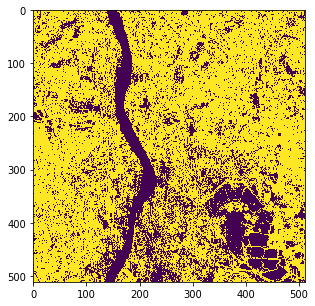

In [45]:
im = Image.fromarray(final_ans)

fig = plt.figure()

plt.rcParams['figure.figsize'] = [5, 5]
plt.imshow(im)

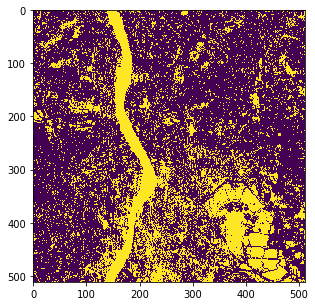

In [46]:
im1 = Image.fromarray(255 - final_ans)
fig = plt.figure()
plt.imshow(im1)